# Previously...
We saw how to deal with the classifiction problems using our 2nd learned method known as KNN for classifiation.

**Now thie thing is** when we tried to fit the data from the *Titanic* dataset, we got some **~ 82%** accuracy. Now I want to try it out, whether we can have some kind of same output here or not...

And yeah our same `WITH and WITHOUT` scaling mode!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
train = pd.read_csv('Titanic_TRAIN.csv')

In [22]:
means = train.groupby('Pclass')['Age'].mean()

In [23]:
def fill(class_age):
    if pd.isnull(class_age[1]):
        return means[class_age[0]]
    return class_age[1]

In [24]:
train['Age'] = train[['Pclass', 'Age']].apply(fill, axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [27]:
train.drop('Cabin', axis= 1, inplace= True)

In [28]:
train.dropna(subset= ['Embarked'], inplace= True)

In [29]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [31]:
train = pd.get_dummies(train, columns= ['Sex', 'Embarked'], drop_first= True)

In [32]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,1,0,0


In [33]:
train.drop(['Name', 'Ticket'], axis= 1, inplace= True)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,1,0,1
887,888,1,1,19.00000,0,0,30.0000,0,0,1
888,889,0,3,25.14062,1,2,23.4500,0,0,1
889,890,1,1,26.00000,0,0,30.0000,1,0,0


In [34]:
train.drop('PassengerId', axis= 1, inplace= True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [35]:
from sklearn.model_selection import train_test_split

# WITHOUT scaling

In [36]:
X = train.drop(['Survived'], axis= 1)
y = train['Survived']

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

### 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(ytest, pred)

0.6966292134831461

In [47]:
accuracy_without = []
for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    accuracy_without.append(accuracy_score(ytest, pred))

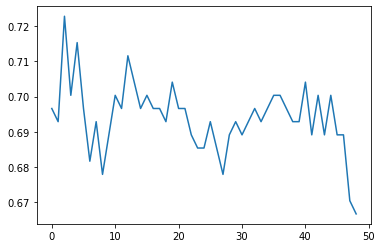

In [48]:
plt.plot(accuracy_without)

## Looks like it (KNN) didn't do well...
The highest accuracy is **~ 0.72** ...

But let's check it `WITH SCALING`.

### 

# WITH scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
std = StandardScaler()
X_sld = std.fit_transform(X)

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_sld, y, test_size= 0.3)

In [53]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)

In [54]:
accuracy_score(ytest, pred)

0.7790262172284644

In [76]:
accuracy_without = []
for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    accuracy_without.append(accuracy_score(ytest, pred))
    
max(accuracy_without)

0.8539325842696629

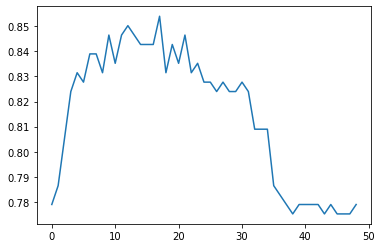

In [77]:
plt.plot(accuracy_without)

# 1st time! KNN done better job with Scaling the inputs!

`Bulli !!`